<a href="https://colab.research.google.com/github/tchamna/LLM-Under-Ressourced-Languages/blob/main/Word2vec_Nufi_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#f78fb3'> Netflix Recommendations System - Word2Vec  |<br> </font>  
# <font color='#3dc1d3'>  
1.  Preprocess data
2.  Transfer Learning, using Google Pretrained Data
3.  Create Word2Vec Model
4.  Content based Recommendation System; Find 'what to watch' based which you movie you watched <br>

## <font color='#f9ca24'> Word Embedding
 <font color='00BFEB'>

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize, sent_tokenize

import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
!pip install gensim #Install gensim, a useful NLP library that we will use to load w2v embeddings
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from matplotlib import pyplot
from gensim.models import KeyedVectors
import warnings  
warnings.filterwarnings(action='ignore',category=UserWarning,module='gensim')  
warnings.filterwarnings(action='ignore',category=FutureWarning,module='gensim')  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from ipykernel import kernelapp as app

<font color='#f78fb3'>Load data 

In [3]:
# from google.colab import files 
# upload = files.upload()

In [4]:
# !unzip netflix
# df = pd.read_csv("netflix_titles.csv")

df = pd.read_csv("https://raw.githubusercontent.com/tchamna/recommender/main/netflix_titles.csv")



In [ ]:
! wget https://raw.githubusercontent.com/tchamna/recommender/main/corpus_vocabulaire_nufi_test.txt

! wget https://raw.githubusercontent.com/tchamna/LLM-Under-Ressourced-Languages/main/main_file3.txt

In [113]:
# df = pd.read_fwf("https://raw.githubusercontent.com/tchamna/recommender/main/phrase_book_guide_conversation_vocabulaire_nufi_test.txt", sep=" ", header=None)
path_file1 = "/content/corpus_vocabulaire_nufi_test.txt"
path_file2 = "/content/main_file3.txt"

# df1_nufi = pd.read_fwf(path_file1, sep=" ", header=None)
# df2_nufi = pd.read_csv(path_file2,  header=None)

with open (path_file1) as f:
  data1 = f.readlines()


with open (path_file2) as f:
  data2 = f.readlines()

data_nufi = data1 + data2

data_nufi = [i.replace("\n","") for i in data_nufi]
data_nufi

data_nufi_unique = list(set(data_nufi))

In [116]:
df_nufi = pd.DataFrame(data_nufi_unique,columns=["text"])
df_nufi

,text
0,
1,Tɑ̀ pɑ̀mfʉ̌mfʉ̌ nját mbīɑ̄ lɑ̄’ ɑ̀ ?
2,Ǎ lén á ntēē zě'è tɑ̀ túfhù kō ā
3,lénù
4,Njéhnòk
...,...
21322,"""Eh bien c'est ça!"""
21323,ntá'nthʉ̄
21324,cám
21325,Ntâ'pù'


### <font color='#f78fb3'>Explore dataset

In [32]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,word_count,new_desc
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,23,planning awesome wedding grandfather polar bea...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,25,jandino asporaat riffs challenges raising kids...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",23,help three human allies autobots protect earth...
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,20,prison ship crash unleashes hundreds deceptico...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,26,nerdy high schooler dani finally attracts inte...


In [33]:
df['description'][0]

'Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first.'

In [34]:
len("ok, je pars".split())

3

In [35]:
df['title'][1000]

"All's Well, End's Well (2009)"

In [36]:
df['description'][1000]

'Bound by a family rule that forbids him from marrying until his stubborn sister gets hitched, a bachelor enlists the help of a love guru to woo her.'

### <font color='#f78fb3'>only show columns of interest

In [37]:
# df2 = df[["title", "description","listed_in"]]
# df2.head(10)

In [38]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

### <font color='#f78fb3'>drop null values in description column

In [39]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
word_count         0
new_desc           0
dtype: int64

In [40]:
df['description'].apply(lambda x: len(str(x).split()))

df_nufi['text'].apply(lambda x: len(str(x).split()))



0        11
1         8
2         8
3         4
4         3
         ..
10898     1
10899     3
10900     4
10901     1
10902     2
Name: text, Length: 10903, dtype: int64

### <font color='#f78fb3'>Visualize the length of descriptions




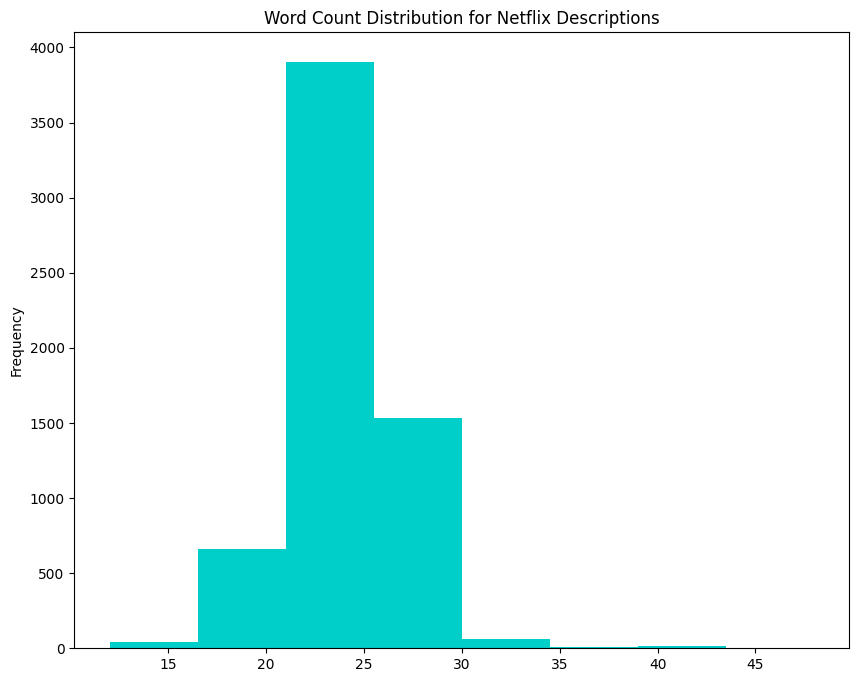

In [41]:
df["word_count"] = df['description'].apply(lambda x: len(str(x).split()))
ax = df['word_count'].plot(
    kind='hist',
    bins=8,
    color='#00cec9',
    figsize = (10,8), title="Word Count Distribution for Netflix Descriptions"
)
#add in the colour
ax.title.set_color("black")
ax.yaxis.label.set_color("black")
ax.xaxis.label.set_color("black")
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')


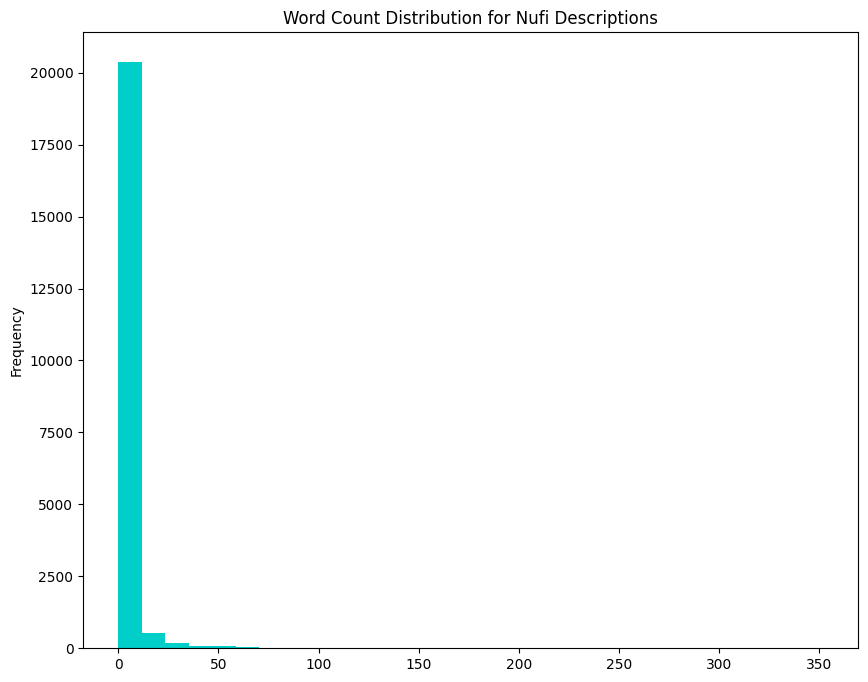

In [118]:
df_nufi["word_count"] = df_nufi['text'].apply(lambda x: len(str(x).split()))
ax = df_nufi['word_count'].plot(
    kind='hist',
    bins=30,
    color='#00cec9',
    figsize = (10,8), title="Word Count Distribution for Nufi Descriptions"
)
#add in the colour
ax.title.set_color("black")
ax.yaxis.label.set_color("black")
ax.xaxis.label.set_color("black")
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')


<font color='#3dc1d3'> Ensure Descriptions only contain strings; not float dtyp; Pandas astype() is the one of the most important methods. It is used to change data type of a series. When data frame is made from a csv file, the columns are imported and data type is set automatically which many times is not what it actually should have. For example, a salary column could be imported as string but to do operations we have to convert it into float. In this case, the series in description column; the dtype needs to be converted to string, ensure it is not float
astype() is used to do such data type conversions.

In [119]:
df['description'] = df['description'].astype(str)

df_nufi['text'] = df_nufi['text'].astype(str)



 ### <font color='#f9ca24'> Preprocessing (cleaning) the Descriptions. <br>
 <font color='#3dc1d3'> Non-ASCII characters: भारत hindi;
.网络 Chinese; Hebrew
.קום, Arabic <br> Ascii - english based letters/digits/

In [44]:
stp = "ngɑ̌ ǒ ǎ pɑ̌h pěn pó ɑ́ ǎ mɑ́ lɑ́ wèn ngɑ̌ yáá pó sì"
set(list(stp.split()))

{'lɑ́', 'mɑ́', 'ngɑ̌', 'pó', 'pěn', 'pɑ̌h', 'sì', 'wèn', 'yáá', 'ǎ', 'ǒ', 'ɑ́'}

In [120]:
def non_ascii(s):
  return "".join(i for i in s if ord(i)<128)

def lower(text):
  return text.lower()

def stop_words(text):
  text = text.split()#split tokens to find stop words
  stops = set(stopwords.words("english"))
  text = [w for w in text if not w in stops]
  text = " ".join(text)
  #join into a string after removing stop words 
  return text 

def stop_words_nufi(text):
  text = text.split()#split tokens to find stop words
  stp = "ngɑ̌ ǒ ǎ pɑ̌h pěn pó ɑ́ ǎ mɑ́ lɑ́ wèn ngɑ̌ yáá pó sì"
  stops = set(list(stp.split()))
  text = [w for w in text if not w in stops]
  text = " ".join(text)
  #join into a string after removing stop words 
  return text 

def clean_html(text):
  html = re.compile('<.*?>')#regex
  return html.sub(r'',text)

def punct(text):
  # token=RegexpTokenizer(r'\w+')#regex
  str_punct = [i for i in string.punctuation if i!= "'" ]  
  translate_table = dict((ord(char), None) for char in str_punct)   
  text = text.translate(translate_table)  
  return text 

punct("Lā' don't lɑ́? mēn a, yè.")


"Lā' don't lɑ́ mēn a yè"

 <font color='#3dc1d3'>A new column is created to store the cleaned, preprocessed descriptions.

In [121]:
df['new_desc'] = df['description'].apply(non_ascii)
df['new_desc'] = df.new_desc.apply(func = lower)
df['new_desc'] = df.new_desc.apply(func = stop_words)
df['new_desc'] = df.new_desc.apply(func = punct)
df['new_desc'] = df.new_desc.apply(func = clean_html)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,word_count,new_desc
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,23,planning awesome wedding grandfather polar bea...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,25,jandino asporaat riffs challenges raising kids...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",23,help three human allies autobots protect earth...
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,20,prison ship crash unleashes hundreds deceptico...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,26,nerdy high schooler dani finally attracts inte...


In [122]:
funcs = ["lower","stop_words_nufi","punct","clean_html"]

df_nufi['new_desc'] = df_nufi['text']
for i in funcs:
   df_nufi['new_desc'] = df_nufi['new_desc'].apply(func = globals()[i])

# df_nufi['text'] =  df_nufi['text'].apply(func = lower)
# df_nufi['new_desc'] =  df_nufi.text.apply(func = stop_words_nufi)
# df_nufi['new_desc'] =  df_nufi.text.apply(func = punct)
# df_nufi['new_desc'] =  df_nufi.text.apply(func = clean_html)



<font color='#f9ca24'>Start Work on the Word2Vec Model<br><font color='#f78fb3'>Splitting the descriptions into words and stored in a list called ‘universe’; universe is essentially our corpus used for training our word2vec model<br>The word2vec tool takes a text corpus as input and produces the word vectors as output. It first constructs a vocabulary from the training text data and then learns vector representation of words. The resulting word vector file can be used as features in many natural language processing and machine learning applications.<br><font color='#f78fb3'>Word tokenization; break up description into word chunks

In [123]:
 df_nufi

,text,word_count,new_desc
0,,0,
1,Tɑ̀ pɑ̀mfʉ̌mfʉ̌ nját mbīɑ̄ lɑ̄’ ɑ̀ ?,7,tɑ̀ pɑ̀mfʉ̌mfʉ̌ nját mbīɑ̄ lɑ̄’ ɑ̀
2,Ǎ lén á ntēē zě'è tɑ̀ túfhù kō ā,9,lén á ntēē zě'è tɑ̀ túfhù kō ā
3,lénù,1,lénù
4,Njéhnòk,1,njéhnòk
...,...,...,...
21322,"""Eh bien c'est ça!""",4,eh bien c'est ça
21323,ntá'nthʉ̄,1,ntá'nthʉ̄
21324,cám,1,cám
21325,Ntâ'pù',1,ntâ'pù'


In [124]:
universe = []
for words in df['new_desc']:
  universe.append(words.split())
  
  #appends split-word element to the end of the list - universe 

universe_nufi = []
for words in df_nufi['text']:
  universe_nufi.append(words.split())

In [125]:
universe_nufi [0:5]

[[],
 ['Tɑ̀', 'pɑ̀mfʉ̌mfʉ̌', 'nját', 'mbīɑ̄', 'lɑ̄’', 'ɑ̀', '?'],
 ['Ǎ', 'lén', 'á', 'ntēē', "zě'è", 'tɑ̀', 'túfhù', 'kō', 'ā'],
 ['lénù'],
 ['Njéhnòk']]

In [126]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,word_count,new_desc
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,23,planning awesome wedding grandfather polar bea...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,25,jandino asporaat riffs challenges raising kids...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",23,help three human allies autobots protect earth...
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,20,prison ship crash unleashes hundreds deceptico...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,26,nerdy high schooler dani finally attracts inte...


<font color='#f9ca24'>Transfer Learning<br><font color='#f78fb3'>using the word2vec pre-trained Google News model (GoogleNews-vectors-negative300) with the gensim Python library.<br>get GoogleNews pretrained data<br> takes a few seconds to load in gensim

In [127]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2023-05-24 01:17:04--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.126.48, 3.5.20.168, 52.217.37.6, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.126.48|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-05-24 01:17:05 ERROR 404: Not Found.



[link text](https://)<font color='#f78fb3'>embedding_file as the GoogleNews-vectors-negative300 file

In [128]:
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'

<font color='#f78fb3'>Training corpus with Google Pretrained Model 

In [129]:
pretrained_model = Word2Vec(size = 300, window=5, min_count = 2, workers=-1)
pretrained_model.build_vocab(universe)
# pretrained_model.intersect_word2vec_format(EMBEDDING_FILE, lockf=1.0, binary = True)
pretrained_model.train(universe, total_examples=pretrained_model.corpus_count, epochs = 5)




TypeError: ignored

In [130]:
model_nufi = Word2Vec(
    universe_nufi,
    min_count=3,  
    sg = 1,       
    window=5      
)       
####################################




In [131]:
term_freq_vect = TfidfVectorizer(stop_words='english',use_idf=False,)

corpus_matrix_tf_nufi = term_freq_vect.fit_transform(df_nufi["text"])
corpus_matrix_tf_nufi.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [132]:
type(corpus_matrix_tf_nufi)

scipy.sparse._csr.csr_matrix

In [133]:
# type(model_nufi2)

In [134]:

model_nufi2 = Word2Vec(window=5)
model_nufi2.build_vocab(universe_nufi)
model_nufi2.train(universe_nufi, total_examples=model_nufi2.corpus_count, epochs = 50)


model_nufi3 = Word2Vec(window=10)
model_nufi3.build_vocab(universe_nufi)
model_nufi3.train(universe_nufi, total_examples=model_nufi2.corpus_count, epochs = 50)



(2287547, 4021000)

<font color='#f78fb3'>Above: intersect_word2vec_format() <br>Merge the input-hidden weight matrix from the original word2vec format given, where it intersects with the current vocabulary/universe corpus. (What you need to note here: No words are added to the existing vocabulary, but intersecting words adopt the file’s weights, and non-intersecting words are left alone.)<br>binary is a boolean indicating whether the data is in binary word2vec format.<br>lockf is a lock-factor value to be set for any imported word-vectors; the default value of 0.0 prevents further updating of the vector during subsequent training. Use 1.0 to allow further training updates of merged vectors.<br>
<br>
The parameters:
min_count =  Ignores all words with total absolute frequency lower than this - (2, 100)<br>
window = The maximum distance between the current and predicted word within a sentence. E.g. window words on the left and window words on the left of our target - (2, 10)<br>
size = int - Dimensionality of the feature vectors. - (50, 300)<br>
sample = float - The threshold for configuring which higher-frequency words are randomly downsampled. Highly influencial. - (0, 1e-5) <br> 
workers = int - Use these many worker threads to train the model (=faster training with multicore machines)<br>
Word2Vec needs a vocabulary; (taking in the tokens and filtering out the unique ones

<font color='#3dc1d3'>Try out the similarity between words; after intersecting with our corpus-universe

In [138]:
# pretrained_model.wv.most_similar(positive=["prince"])
#paramater positive: gives a list of keys that contribute positively 

In [139]:
model_nufi.wv.most_similar(positive=["mʉ̀nzhwīē"])


[('nkhʉ́ɑ́', 0.9982105493545532),
 ('kɑ̌', 0.9979952573776245),
 ("Pɑ́'", 0.9979389309883118),
 ('zhínù', 0.9978634715080261),
 ("mbè'", 0.9978057146072388),
 ("tō'", 0.9977948665618896),
 ('ndòm', 0.9977794289588928),
 ('nēhē', 0.9977196455001831),
 ('Nǔ', 0.9975755214691162),
 ('Nù', 0.9975503087043762)]

In [140]:
model_nufi2.wv.most_similar(positive=["mʉ̀nzhwīē"])


[("mbâ'", 0.6926679015159607),
 ("mbǔ'ntōk", 0.5461939573287964),
 ("mbā'", 0.540339469909668),
 ('yàā', 0.5233409404754639),
 ("Ŋwɑ̀'nǐ", 0.5170107483863831),
 ("ngʉ̄ɑ̄'", 0.5101594924926758),
 ('mʉ̀nzhwíé', 0.47740843892097473),
 ('mʉ̀', 0.46901941299438477),
 ('nzhʉ̀nzhʉ̀ɑ̀', 0.464944988489151),
 ('Mvèn', 0.4566948115825653)]

In [141]:
model_nufi3.wv.most_similar(positive=["mʉ̀nzhwīē"])


[("mbâ'", 0.6316391229629517),
 ("Ŋwɑ̀'nǐ", 0.5117629170417786),
 ('yàā', 0.49774524569511414),
 ("mbǔ'ntōk", 0.4960060715675354),
 ('sēē', 0.4895785450935364),
 ("mbā'", 0.4664396643638611),
 ('yʉ̄ɑ̄', 0.4633973240852356),
 ('nēhē', 0.445626437664032),
 ('nùfī', 0.44511741399765015),
 ('těndʉ̄ɑ̄', 0.43800872564315796)]

In [142]:
model_nufi2.wv.most_similar(positive=["nkɑ̄ɑ̄"])


[('bà', 0.625583827495575),
 ('bǐ', 0.5816420912742615),
 ('Nkɑ̄ɑ̄', 0.5359141826629639),
 ('ntóó', 0.5015014410018921),
 ('nshìè', 0.49016332626342773),
 ("hě'", 0.4857308268547058),
 ('ghɑ̀ɑ́', 0.48324403166770935),
 ('ncámncām', 0.4829707145690918),
 ('ndɑ́ɑ́', 0.46394625306129456),
 ('hù', 0.4614826738834381)]

In [143]:
model_nufi3.wv.most_similar(positive=["nkɑ̄ɑ̄"])


[('bǐ', 0.6122033596038818),
 ('wú', 0.5374934673309326),
 ('ncámncām', 0.5310200452804565),
 ('bà', 0.5295873284339905),
 ('hù', 0.5222473740577698),
 ('Nkɑ̄ɑ̄', 0.511907696723938),
 ('nshìè', 0.5050908923149109),
 ('ndō', 0.458090603351593),
 ('zhínǔ', 0.4532032310962677),
 ('ncáh', 0.4402349889278412)]

In [144]:
model_nufi2.wv.most_similar(positive=["nshì"])


[('nzhì', 0.5222407579421997),
 ('wò,', 0.509823203086853),
 ('nnū', 0.4960354268550873),
 ('nzēn', 0.48412948846817017),
 ('kwéndʉ̄ɑ̄', 0.4764200448989868),
 ("ntìé'è", 0.4714769124984741),
 ('těn', 0.45019134879112244),
 ('ndhī', 0.44538265466690063),
 ('nsóh', 0.4451776146888733),
 ('nā', 0.4435928165912628)]

In [145]:
model_nufi3.wv.most_similar(positive=["nshì"])


[('nzhì', 0.6069810390472412),
 ('wò,', 0.5782186388969421),
 ('kɔ̀', 0.5252049565315247),
 ('těn', 0.5156952738761902),
 ('bā', 0.5132479071617126),
 ('nnū', 0.48468950390815735),
 ('n̄tōh', 0.4587220549583435),
 ("zhʉ̄ɑ̄'", 0.455670565366745),
 ('nā', 0.45373061299324036),
 ('nzhìndʉ̄ɑ̄', 0.4397268295288086)]

In [146]:
model_nufi2.wv.most_similar(positive=["mbɑ̄'"])


[('mɑ̄vǒ', 0.662600576877594),
 ('lɑ̀ɑ̀sì', 0.5842387676239014),
 ('ē', 0.5703632235527039),
 ('ndāmɑ̀', 0.5688769817352295),
 ('mbɑ̄’', 0.5512606501579285),
 ("Ntìè'", 0.5107376575469971),
 ("ngà'mfɑ̌'", 0.5007897615432739),
 ('mɑ̄vǒ,', 0.4987708032131195),
 ('ō!', 0.4975232779979706),
 ("pɑ̀mbɑ̄'", 0.4971081614494324)]

In [147]:
model_nufi3.wv.most_similar(positive=["mbɑ̄'"])


[('mɑ̄vǒ', 0.5998213887214661),
 ('ē', 0.5777889490127563),
 ("Ntìè'", 0.5542492866516113),
 ('à,', 0.5482761263847351),
 ('lɑ̀hɑ̌', 0.5477041006088257),
 ('lɑ̀ɑ̀sì', 0.5472564101219177),
 ('ndāmɑ̀', 0.5395880937576294),
 ('shʉ̄', 0.5166949033737183),
 ('mɑ̄vǒ,', 0.5118116140365601),
 ("ntìè'", 0.48681172728538513)]

In [148]:
model_nufi2.wv.similarity("mbɑ̄'","mɑ̄")

0.4642534

In [151]:
model_nufi2.wv.similarity("nkùnkū'","ndámnsāk")

KeyError: ignored

In [152]:
model_nufi2.wv.most_similar(positive=["nsāh"],topn=15)

# Word2Vec.most_similar(positive=[], negative=[], topn=10, restrict_vocab=None, indexer=None)[source]



[("shʉ̄'", 0.6348087787628174),
 ('"', 0.6156414151191711),
 ('Fə̀', 0.5879638195037842),
 ("Ngwě'", 0.5854148268699646),
 ('Yò', 0.5742785334587097),
 ('Mɑ́', 0.5643831491470337),
 ("Kwɑ̀'", 0.5614205002784729),
 ('Ń', 0.5501661896705627),
 ('Ɑ́', 0.5489246845245361),
 ('Nsī', 0.527958333492279),
 ("sɑ́'", 0.5222506523132324),
 ('pʉ̄nkhʉ̄ɑ̄', 0.5161186456680298),
 ('Ghʉ̀', 0.5159367322921753),
 ('Táà', 0.5137884616851807),
 ('mvǎk', 0.5097817182540894)]

In [153]:
model_nufi3.wv.most_similar(positive=["nsāh"],topn=15)


[("shʉ̄'", 0.6661079525947571),
 ('Yò', 0.6078460812568665),
 ('Mɑ́', 0.6026222705841064),
 ('mvǎk', 0.5616730451583862),
 ("Ngwě'", 0.5571668148040771),
 ('pǎh', 0.5393667221069336),
 ('Ghʉ̀', 0.5318295359611511),
 ('Ngòfát', 0.5312331914901733),
 ('mɑ̀mbīɑ̄', 0.5297791957855225),
 ('zɑ̄ɑ̄', 0.5212304592132568),
 ('Ń', 0.5111274719238281),
 ("Kwɑ̀'", 0.5096753835678101),
 ('"', 0.5084148049354553),
 ('pʉ̄nkhʉ̄ɑ̄', 0.5049961805343628),
 ('Fə̀', 0.4985679090023041)]

In [154]:
model_nufi2.wv.most_similar(positive=["mbìyā'"],topn=15)


[('nsén', 0.7576327919960022),
 ("nsǐmbā'", 0.7379561066627502),
 ('Njɑ̀ɑ̀', 0.7338049411773682),
 ('njɑ̀ɑ̀', 0.7251114845275879),
 ("mfʉ̀'", 0.7237542867660522),
 ('zàtsì', 0.7201363444328308),
 ('wùɑ̀', 0.7189926505088806),
 ('kōō', 0.7165888547897339),
 ('pēē', 0.7149099707603455),
 ('Mfāt', 0.7049063444137573),
 ('shìà', 0.7035930752754211),
 ("ndə̄'sī", 0.7012258768081665),
 ("mfî'kè'", 0.7000905275344849),
 ("nkā'", 0.6959735751152039),
 ('ncîcāt', 0.693303644657135)]

In [155]:
model_nufi3.wv.most_similar(positive=["mbìyā'"],topn=15)


[("nsǐmbā'", 0.7364881634712219),
 ('kōō', 0.7276657223701477),
 ('Njɑ̀ɑ̀', 0.7274610996246338),
 ("mfʉ̀'", 0.726249098777771),
 ('Mfāt', 0.714459240436554),
 ("mfî'kè'", 0.7089133262634277),
 ('tíì', 0.7038666009902954),
 ('mvēlɑ̀', 0.6999247074127197),
 ('wùɑ̀', 0.6998553276062012),
 ('Fǎb', 0.6992136240005493),
 ('nsén', 0.699152410030365),
 ("mɑ̀njā'", 0.698840320110321),
 ('zàtsì', 0.6936758160591125),
 ('shìà', 0.693296492099762),
 ("nzhʉ̀'", 0.6930136680603027)]

In [186]:
model_nufi3.wv.most_similar(positive=["mōō"],topn=15)


[('mōō,', 0.5825445652008057),
 ("ntìè',", 0.5284923315048218),
 ('móó', 0.5138638615608215),
 ('Mbə̄ə̄', 0.49194154143333435),
 ('mɑ̄ndáh', 0.49140816926956177),
 ('yàā', 0.48967722058296204),
 ('Mbə̄', 0.4470604360103607),
 ('wúɑ́', 0.4364188015460968),
 ('fʉ̀ɑ̀', 0.4304186701774597),
 ('pʉ̄h', 0.42983144521713257),
 ('mɑ̀njīī', 0.4232865869998932),
 ("lí'", 0.4175821542739868),
 ('sō', 0.41555917263031006),
 ('mʉ̌', 0.41326138377189636),
 ('nò', 0.4120425283908844)]

In [190]:
model_nufi3.wv.most_similar_cosmul(positive=["mbɑ̄'"],negative = ['mɑ̄'])



[("sāhndó'", 1.7435261011123657),
 ('fēn', 1.7200030088424683),
 ('hə̀ə̄', 1.655534029006958),
 ("nkà'", 1.6049630641937256),
 ('Béé', 1.5974388122558594),
 ('tám', 1.5813614130020142),
 ('sə̀ə̀mbʉ́ɑ́', 1.579093337059021),
 ("líé'nzɑ̄", 1.565712571144104),
 ("ŋwá'nthʉ̄", 1.561315655708313),
 ('lɑ̀hɑ̌', 1.5585445165634155)]

In [159]:
len(model_nufi2.wv.vocab)

AttributeError: ignored

In [161]:
# pretrained_model.wv.similarity("king","queen")

NameError: ignored

In [79]:
pretrained_model.wv.similarity("hand","queen")

NameError: ignored

<font color='#f78fb3'>The function Vectorize() defines the average word2vec for each Netflix description

In [80]:
def vectorize():

  global embeddings
  embeddings = []
  #a list to store the vectors; these are vectorized Netflix Descriptions
  for line in df['new_desc']: #for each cleaned description
    w2v = None
    count = 0
    for word in line.split():
      if word in pretrained_model.wv.vocab:
        count += 1
        if w2v is None:
          w2v = pretrained_model.wv[word]
        else:
          w2v = w2v + pretrained_model.wv[word]
    if w2v is not None:
      w2v = w2v / count
      #append element to the end of the embeddings list 
      embeddings.append(w2v)

In [182]:
def vectorize_nufi():

  global embeddings_nufi
  embeddings_nufi = []
  #a list to store the vectors; these are vectorized Netflix Descriptions
  for line in df_nufi['text']: #for each cleaned description
    w2v = None
    count = 0
    for word in line.split():
      if word in model_nufi2.wv.vocab:
        count += 1
        if w2v is None:
          w2v = model_nufi2.wv[word]
        else:
          w2v = w2v + model_nufi2.wv[word]
    if w2v is not None:
      w2v = w2v / count
      #append element to the end of the embeddings list 
      embeddings_nufi.append(w2v)

In [183]:
vectorize_nufi()
# embeddings_nufi


AttributeError: ignored

<font color='#f78fb3'>define the function to find the top 5 most similar/recommended Netflix shows, based on the one you previously watched.<br>Invert index; we have a dictionary of characters/embeddings from Description mapped to their titles, and we want to convert that to a dictionary of titles mapped to the characters that have them.<br> We trained on the descriptions of the Netflix shows but we want to search/match based on a title. 

In [184]:
def netflix_because_you_watched(title):
  # vectorize(df)
  cosine_similarities = cosine_similarity(embeddings,embeddings)
  netflix_shows = df[['title']]#new dataframe with reversed indexes
  indices = pd.Series(df.index, index = df['title']).drop_duplicates()
  ix = indices[title]
  cosine_sim = list(enumerate(cosine_similarities[ix]))
  #enumerate adds a counter to an iteratable and returns it 
  cosine_sim = sorted(cosine_sim, key = lambda x: x[1], reverse = True)
  cosine_sim = cosine_sim[1:6] #we want the top 5 similar netflix shows 
  netflix_index = [i[0] for i in cosine_sim]
  watch_next = netflix_shows.iloc[netflix_index]
  for index, row in watch_next.iterrows():
    print(row['title'])


In [180]:
def nufi_words_alike(your_word):
  # vectorize(df)
  cosine_similarities = cosine_similarity(embeddings_nufi,embeddings_nufi)
  text_nufi = df_nufi[['text']]#new dataframe with reversed indexes
  indices = pd.Series(df_nufi.index, index = df_nufi['text']).drop_duplicates()
  ix = indices[your_word]
  cosine_sim = list(enumerate(cosine_similarities[ix]))
  #enumerate adds a counter to an iteratable and returns it 
  cosine_sim = sorted(cosine_sim, key = lambda x: x[1], reverse = True)
  cosine_sim = cosine_sim[1:6] #we want the top 5 similar words 
  nufi_index = [i[0] for i in cosine_sim]
  similar_words = text_nufi.iloc[nufi_index]
  for index, row in similar_words.iterrows():
    print(row['text'])


In [185]:
nufi_words_alike("mbɑ̄'")

ValueError: ignored

In [167]:
nufi_words_alike("nkɑ̄ɑ̄")

ValueError: ignored

In [168]:
nufi_words_alike("mʉ̀nzhwīē")

ValueError: ignored

<font color='#3dc1d3'>sorted() function returns a sorted list of the specified iterable object.

You can specify ascending or descending order. Strings are sorted alphabetically, and numbers are sorted numerically.
Example below: 

In [ ]:
a = (1, 11, 2)
x = sorted(a)
print(x)

[1, 2, 11]


<font color='#f9ca24'> Netflix Recommendations 

In [ ]:
vectorize()
netflix_because_you_watched("Apaches")

Fatal Destiny
The Writer
In Family I Trust
Masoom
The Croods


In [ ]:
netflix_because_you_watched("Friends")

Theeya Velai Seyyanum Kumaru
Karthik Calling Karthik
My Girl
Workin' Moms
The Time Traveler's Wife


In [ ]:
netflix_because_you_watched("Transformers Prime")

Transformers: Robots in Disguise
Banana Island Ghost
Steve Jobs
Enlighten Us
New Girl
